In [33]:
#Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [34]:
dataset = pd.read_csv("Churn_Modelling.csv")

x = dataset.iloc[:,3:13].values
x
y = dataset.iloc[:,13].values
y

array([1, 0, 1, ..., 1, 1, 0])

In [35]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
x[:,2] = labelencoder.fit_transform(x[:,2])
x[:,1] = labelencoder.fit_transform(x[:,1])
x

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [36]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('Country', OneHotEncoder(), [1])], remainder='passthrough')
x = ct.fit_transform(x)
x

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [37]:
x = pd.DataFrame(x, columns = ["X1", "X2", "X3", "CreditScore", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"])
x

,X1,X2,X3,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,619,0,42,2,0.0,1,1,1,101348.88
1,0.0,0.0,1.0,608,0,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,502,0,42,8,159660.8,3,1,0,113931.57
3,1.0,0.0,0.0,699,0,39,1,0.0,2,0,0,93826.63
4,0.0,0.0,1.0,850,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,771,1,39,5,0.0,2,1,0,96270.64
9996,1.0,0.0,0.0,516,1,35,10,57369.61,1,1,1,101699.77
9997,1.0,0.0,0.0,709,0,36,7,0.0,1,0,1,42085.58
9998,0.0,1.0,0.0,772,1,42,3,75075.31,2,1,0,92888.52


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train

array([[-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [40]:
clf = DecisionTreeClassifier(max_depth=6)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.866


In [41]:
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


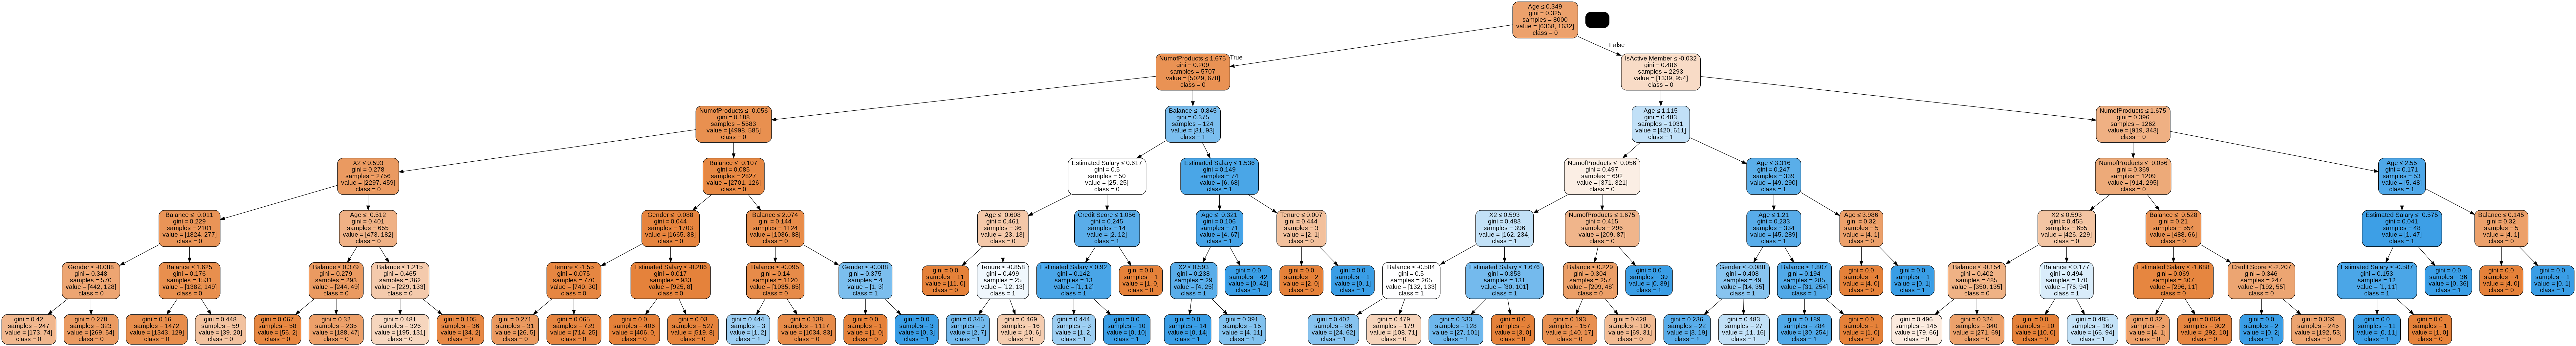

In [42]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
feature_cols = ["X1", "X2", "X3", "Credit Score", "Gender", "Age","Tenure", "Balance", "NumofProducts", "HasCrCard", "IsActive Member", "Estimated Salary"]
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('creditmodel.png')
Image(graph.create_png())

Accuracy: 0.866
[[1532   63]
 [ 205  200]]


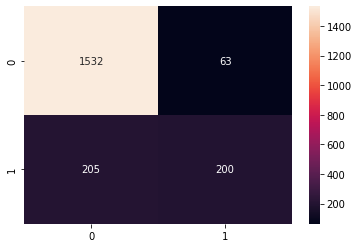

In [43]:
import seaborn as sns
from sklearn import metrics

y_pred = clf.predict(x_test)
y_pred = (y_pred>0.45) #play around with cutoff to get the max accuracy

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot = True, fmt = '')